<a href="https://colab.research.google.com/github/deepakgowtham/EVA4/blob/master/Week11/Session_11_CIFAR_ocp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##Clone Github Directory to import packages
%%bash
mkdir temp
git clone https://github.com/bikash-bhoi/eva4.git temp
if [ ! -d ./models ]; then
    mkdir models
fi
if [ ! -d ./utils ]; then
    mkdir utils
fi
cp -r temp/models/* ./models
cp -r temp/utils/* ./utils
rm -rf temp

Cloning into 'temp'...


In [0]:
!pip install pytorch-gradcam
!pip install albumentations
!pip install --no-cache-dir git+https://github.com/NVIDIA/apex

In [0]:
from utils.download_load import download_load
from utils.display_imgs import display_imgs
from utils.train_test import train , test, predict, get_misclassified
from utils.disp_summary import disp_summary
from utils.gradcam import grad_cam, gradcam_plot
from models.custom_resnet import cust_resnet
from utils.range_test import lr_range_test
from utils.zig_zag_plot import zigzag_plot

import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import torchvision
import torchsummary
from torchsummary import summary
import torch

2.0


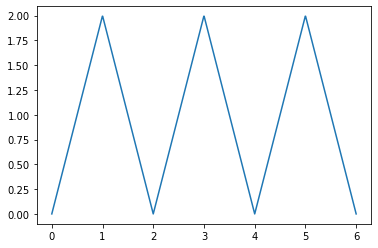

In [0]:
zigzag_plot(num_trianges = 3, min_val = 0, max_val = 2, triangle_base = 2)


In [0]:
trainset, testset, train_loader, test_loader, classes =download_load(train_bs=512,test_bs=512)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


In [0]:
display_imgs(train_loader, classes)

In [0]:
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
model=cust_resnet().to(device)

In [0]:
disp_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

/content/models/custom_resnet.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)


  0%|          | 0/98 [00:00<?, ?it/s]

LR: 0.0001


/content/models/custom_resnet.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)
Loss=2.0010743141174316 Batch_id=97 Accuracy=22.09: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.8781, Accuracy: 3225/10000 (32.25%)

LR: 0.0002


Loss=1.9040861129760742 Batch_id=97 Accuracy=24.85: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.7576, Accuracy: 3703/10000 (37.03%)

LR: 0.00030000000000000003


Loss=1.8074438571929932 Batch_id=97 Accuracy=28.15: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.6248, Accuracy: 4143/10000 (41.43%)

LR: 0.0004


Loss=1.6605349779129028 Batch_id=97 Accuracy=29.42: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.5694, Accuracy: 4289/10000 (42.89%)

LR: 0.0005


Loss=1.6245641708374023 Batch_id=97 Accuracy=30.56: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.5289, Accuracy: 4509/10000 (45.09%)

LR: 0.0006000000000000001


Loss=1.5735678672790527 Batch_id=97 Accuracy=31.46: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4821, Accuracy: 4644/10000 (46.44%)

LR: 0.0007


Loss=1.540835976600647 Batch_id=97 Accuracy=32.69: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4789, Accuracy: 4639/10000 (46.39%)

LR: 0.0008


Loss=1.5577157735824585 Batch_id=97 Accuracy=33.22: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4442, Accuracy: 4767/10000 (47.67%)

LR: 0.0009000000000000001


Loss=1.5588968992233276 Batch_id=97 Accuracy=34.75: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4223, Accuracy: 4865/10000 (48.65%)

LR: 0.001


Loss=1.4929717779159546 Batch_id=97 Accuracy=34.22: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4102, Accuracy: 4927/10000 (49.27%)

LR: 0.001


Loss=1.4844980239868164 Batch_id=97 Accuracy=34.66: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4178, Accuracy: 4848/10000 (48.48%)

LR: 0.002


Loss=1.4111530780792236 Batch_id=97 Accuracy=38.35: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3242, Accuracy: 5317/10000 (53.17%)

LR: 0.003


Loss=1.3819968700408936 Batch_id=97 Accuracy=38.95: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3017, Accuracy: 5370/10000 (53.70%)

LR: 0.004


Loss=1.6310272216796875 Batch_id=97 Accuracy=36.73: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4123, Accuracy: 5098/10000 (50.98%)

LR: 0.005


Loss=1.4135854244232178 Batch_id=97 Accuracy=38.01: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2595, Accuracy: 5525/10000 (55.25%)

LR: 0.006


Loss=1.4774775505065918 Batch_id=97 Accuracy=35.48: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4946, Accuracy: 4735/10000 (47.35%)

LR: 0.007000000000000001


Loss=1.5869649648666382 Batch_id=97 Accuracy=31.23: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.6465, Accuracy: 4147/10000 (41.47%)

LR: 0.008


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.7066, Accuracy: 4011/10000 (40.11%)

LR: 0.009


Loss=1.6775075197219849 Batch_id=97 Accuracy=26.96: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.6585, Accuracy: 4079/10000 (40.79%)

LR: 0.01


Loss=1.9704538583755493 Batch_id=97 Accuracy=23.24: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]



Test set: Average loss: 2.1591, Accuracy: 3432/10000 (34.32%)



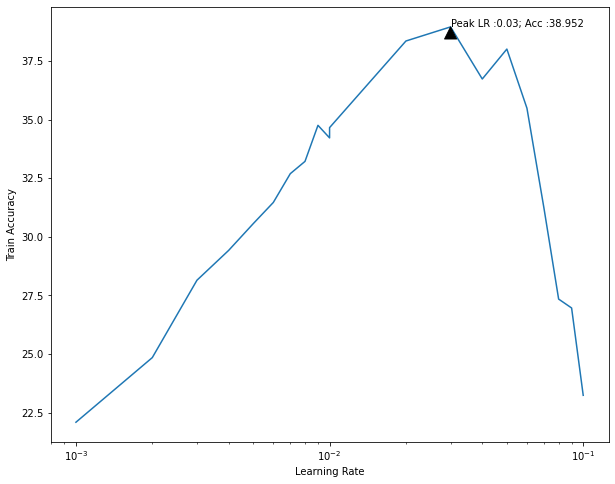

LRs used for range  test :  [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
Train Accuracies :  [22.092, 24.848, 28.148, 29.42, 30.56, 31.464, 32.692, 33.216, 34.754, 34.218, 34.656, 38.35, 38.952, 36.73, 38.006, 35.484, 31.23, 27.344, 26.964, 23.24]
Test acc:  38.952 LR:  0.03


In [0]:
lrs = [j*(10**i) for i in range(-3,-1) for j in range(1,11)]
lr_range_test(lrs,model,device,train_loader, test_loader)


In [0]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
model = cust_resnet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,  momentum=0.9)
scheduler = OneCycleLR(optimizer, max_lr=0.03,  total_steps=24,pct_start=0.2083, final_div_factor=1, div_factor=10)
lrs=[]

for epoch in range(1, 25):
    curr_lr=optimizer.param_groups[0]['lr']
    lrs.append(curr_lr)
    print(f'Epoch: {epoch} Learning_Rate {curr_lr}')
    train_acc1 = train(model, device, train_loader, optimizer, epoch)
    test_acc1 = test(model, device, test_loader)
    print('Test acc:', test_acc1)
    scheduler.step()


  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 1 Learning_Rate 0.002999999999999999


/content/models/custom_resnet.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)
Loss=1.3793246746063232 Batch_id=97 Accuracy=36.69: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2689, Accuracy: 5354/10000 (53.54%)

Test acc: 53.54
Epoch: 2 Learning_Rate 0.006955558344737111


Loss=1.3003016710281372 Batch_id=97 Accuracy=52.38: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2353, Accuracy: 5645/10000 (56.45%)

Test acc: 56.45
Epoch: 3 Learning_Rate 0.016504241998412234


Loss=1.0251619815826416 Batch_id=97 Accuracy=56.89: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0076, Accuracy: 6626/10000 (66.26%)

Test acc: 66.26
Epoch: 4 Learning_Rate 0.02605043980435138


Loss=0.8906236290931702 Batch_id=97 Accuracy=62.66: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.9961, Accuracy: 6943/10000 (69.43%)

Test acc: 69.43
Epoch: 5 Learning_Rate 0.029999999881902766


Loss=0.9786694645881653 Batch_id=97 Accuracy=68.62: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8133, Accuracy: 7420/10000 (74.20%)

Test acc: 74.2
Epoch: 6 Learning_Rate 0.02981559904845503


Loss=0.9494925141334534 Batch_id=97 Accuracy=71.65: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8510, Accuracy: 7410/10000 (74.10%)

Test acc: 74.1
Epoch: 7 Learning_Rate 0.029268013899015125


Loss=0.8729277849197388 Batch_id=97 Accuracy=74.34: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6441, Accuracy: 8007/10000 (80.07%)

Test acc: 80.07
Epoch: 8 Learning_Rate 0.02837217987413087


Loss=0.7292106747627258 Batch_id=97 Accuracy=76.21: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5585, Accuracy: 8142/10000 (81.42%)

Test acc: 81.42
Epoch: 9 Learning_Rate 0.027152530937785864


Loss=0.6896645426750183 Batch_id=97 Accuracy=77.99: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5547, Accuracy: 8214/10000 (82.14%)

Test acc: 82.14
Epoch: 10 Learning_Rate 0.025642333138551056


Loss=0.5835291147232056 Batch_id=97 Accuracy=79.50: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4844, Accuracy: 8420/10000 (84.20%)

Test acc: 84.2
Epoch: 11 Learning_Rate 0.023882777274732408


Loss=0.49893873929977417 Batch_id=97 Accuracy=79.70: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5108, Accuracy: 8383/10000 (83.83%)

Test acc: 83.83
Epoch: 12 Learning_Rate 0.021921855411164964


Loss=0.5271540284156799 Batch_id=97 Accuracy=81.92: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4544, Accuracy: 8537/10000 (85.37%)

Test acc: 85.37
Epoch: 13 Learning_Rate 0.01981305189077181


Loss=0.48757070302963257 Batch_id=97 Accuracy=83.16: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4176, Accuracy: 8626/10000 (86.26%)

Test acc: 86.26
Epoch: 14 Learning_Rate 0.01761388454368051


Loss=0.4580290615558624 Batch_id=97 Accuracy=83.26: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4318, Accuracy: 8593/10000 (85.93%)

Test acc: 85.93
Epoch: 15 Learning_Rate 0.01538433588256656


Loss=0.444222629070282 Batch_id=97 Accuracy=84.34: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4384, Accuracy: 8623/10000 (86.23%)

Test acc: 86.23
Epoch: 16 Learning_Rate 0.01318521707353006


Loss=0.39134088158607483 Batch_id=97 Accuracy=85.65: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4382, Accuracy: 8604/10000 (86.04%)

Test acc: 86.04
Epoch: 17 Learning_Rate 0.011076509305366113


Loss=0.4018968343734741 Batch_id=97 Accuracy=85.98: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3829, Accuracy: 8784/10000 (87.84%)

Test acc: 87.84
Epoch: 18 Learning_Rate 0.009115727796550531


Loss=0.4141755700111389 Batch_id=97 Accuracy=86.71: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3437, Accuracy: 8870/10000 (88.70%)

Test acc: 88.7
Epoch: 19 Learning_Rate 0.007356353061816279


Loss=0.3709797263145447 Batch_id=97 Accuracy=87.78: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3333, Accuracy: 8890/10000 (88.90%)

Test acc: 88.9
Epoch: 20 Learning_Rate 0.005846372225684242


Loss=0.41547590494155884 Batch_id=97 Accuracy=87.97: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3327, Accuracy: 8916/10000 (89.16%)

Test acc: 89.16
Epoch: 21 Learning_Rate 0.00462697016876973


Loss=0.30926215648651123 Batch_id=97 Accuracy=88.97: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3231, Accuracy: 8927/10000 (89.27%)

Test acc: 89.27
Epoch: 22 Learning_Rate 0.0037314062059821424


Loss=0.27468809485435486 Batch_id=97 Accuracy=89.71: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3061, Accuracy: 9003/10000 (90.03%)

Test acc: 90.03
Epoch: 23 Learning_Rate 0.0031841069353339816


Loss=0.27790218591690063 Batch_id=97 Accuracy=89.90: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2991, Accuracy: 9017/10000 (90.17%)

Test acc: 90.17
Epoch: 24 Learning_Rate 0.003


Loss=0.20267312228679657 Batch_id=97 Accuracy=90.21: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 0.2945, Accuracy: 9050/10000 (90.50%)

Test acc: 90.5


In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
PATH = '/content/gdrive/My Drive/Colab Notebooks/eva4_s9/assignment11_ResNetcust_model.h5'
!touch PATH
torch.save(model.state_dict(), PATH)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
